In [85]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

p1=(3.351639876426212, -1), p2=(0.9670080492661093, 1)
p1=(4.573094850222256, -1), p2=(-3.8471389469194173, 1)
p1=(2.451333576806319, -1), p2=(-0.40705400297627836, 1)
p1=(-4.021549549043436, -1), p2=(2.865814925499085, 1)


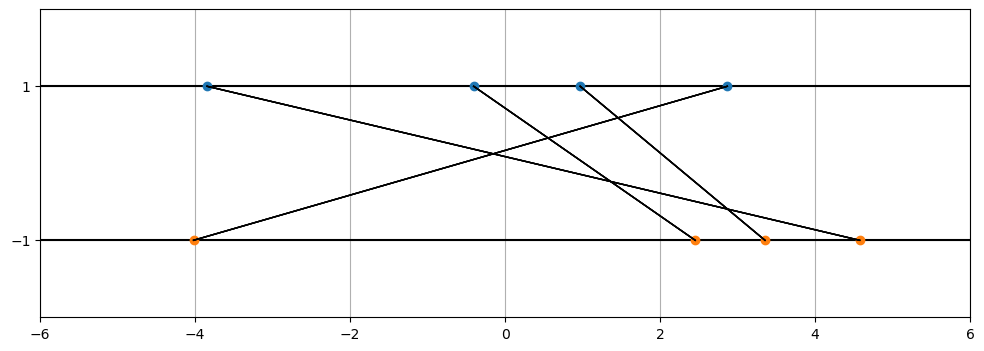

In [89]:
n = 4
p = np.random.uniform(-5, 5, n)
q = np.random.uniform(-5, 5, n)

class Point:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
    def __str__(self):
        return f"{(self.x, self.y)}"

class Line:
    def __init__(self, idx, p1, p2):
        self.idx = idx
        self.p1 = p1
        self.p2 = p2
    def __str__(self):
        return f"p1={self.p1}, p2={self.p2}"

lines = []
for i in range(len(p)):
    p1 = Point(p[i], -1)
    p2 = Point(q[i], +1)
    line = Line(i, p1, p2)
    lines.append(line)
    
for line in lines:
    print(line)

def ccw(A,B,C):
    return (C.y-A.y) * (B.x-A.x) > (B.y-A.y) * (C.x-A.x)

def intersect(L1, L2):
    return ccw(L1.p1,L2.p1,L2.p2) != ccw(L1.p2,L2.p1,L2.p2) and ccw(L1.p1,L1.p2,L2.p1) != ccw(L1.p1,L1.p2,L2.p2)

matplotlib.rcParams['figure.figsize'] = [12, 4]

fig, ax = plt.subplots()

ax.plot([-6, 6], [1, 1], color="black")
ax.plot([-6, 6], [-1, -1], color="black")
ax.plot(q, np.full_like(q, 1), lw=0, ms=6, marker="o")
ax.plot(p, np.full_like(p, -1), lw=0, ms=6, marker="o")

for i in range(len(p)):
    ax.plot([p, q],[-1, 1], color="black", lw=1)

ax.set_xlim(-6, 6)
ax.set_ylim(-2, 2)
ax.set_yticks([-1, 1])
ax.grid(True)

plt.show()


In [91]:
def brute_force(lines):
    intersections = 0
    checks = 0
    for i in range(0, len(lines)-1):
        for j in range(i, len(lines)):
            line1 = lines[i]
            line2 = lines[j]
            checks += 1
            if intersect(line1, line2):
                intersections += 1
    return checks, intersections

def find_new_lines(x, upcoming_lines):
    new_lines = []
    upcoming_lines_new = []
    for line in upcoming_lines:
        if(line.p1.x > x and line.p2.x > x):
            upcoming_lines_new.append(line)
        else:
            new_lines.append(line)
    return new_lines, upcoming_lines_new

def remove_old_lines(x, current_lines):
    current_lines_new = []
    for line in current_lines:
        if(line.p1.x > x or line.p2.x > x):
            current_lines_new.append(line) # keep line
    return current_lines_new

def sweep(lines):

    c = []
    for line in lines:
        c.append(line.p1.x)
        c.append(line.p2.x)
    c.sort()

    current_lines = []
    upcoming_lines = lines

    sweep_idx = 0
    intersections = 0
    checks = 0

    while(sweep_idx < len(c)):
        
        sweep_x = c[sweep_idx]
    
        current_lines = remove_old_lines(sweep_x, current_lines)
        new_lines, upcoming_lines = find_new_lines(sweep_x, upcoming_lines)

        next_checks = []
        for new_line in new_lines:
            for curr_line in current_lines:
                next_checks.append((new_line, curr_line))

        for line1, line2 in next_checks:
            checks += 1
            if intersect(line1, line2):
                intersections += 1
                    
        sweep_idx += 1
    
    return checks, intersections

print(brute_force(lines))
print(sweep(lines))



(9, 5)
[]
[]
[]
[]
(0, 0)
